# House Price Prediction using Machine Learning with Python

House price prediction system using Machine Learning with Python. Boston house price prediction.

### Import the Dependencies

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 20 kB/s 


In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot

### Importing Boston House Price Dataset

In [ ]:
# read the dataset
house_price_dataset = pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')
house_price_dataset

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [ ]:
# print the first 5 rows of tha dataset
house_price_dataset.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
# Checking the number of rows and columns
house_price_dataset.shape

(414, 9)

In [ ]:
# Check for missing values
house_price_dataset.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [ ]:
# duplicated values in the dataset
house_price_dataset.duplicated().sum()

0

In [ ]:
house_price_dataset.rename({'House size (sqft)': 'House_Area (sqft)', 'House price of unit area': 'House_Price', 'House Age': 'House_Age'}, axis = 1, inplace = True)

In [ ]:
# Statistical measures of the dataset
house_price_dataset.describe()

,Transaction date,House_Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House_Area (sqft),House_Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


### Exploratory Data Analysis

Skewness of House_Age: 0.38292623077299737
Kurtosis of House_Age: -0.8771201112290763


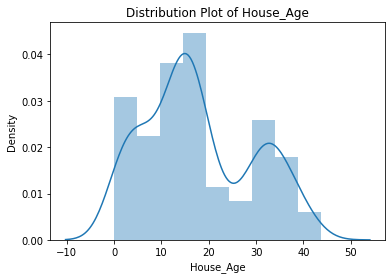

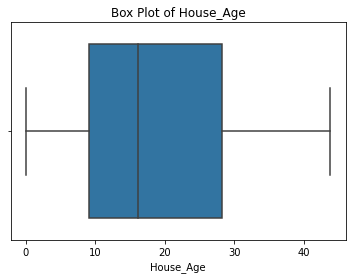

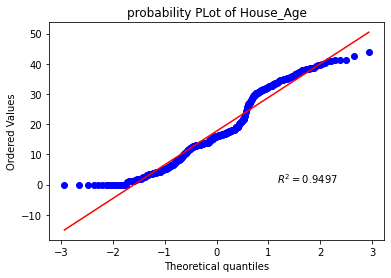

Skewness of Distance from nearest Metro station (km): 1.8887565801256048
Kurtosis of Distance from nearest Metro station (km): 3.20786836751181


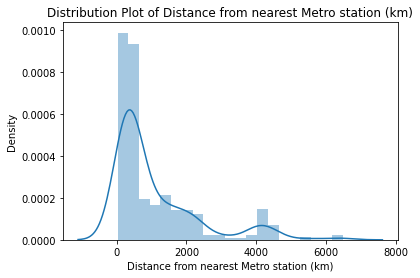

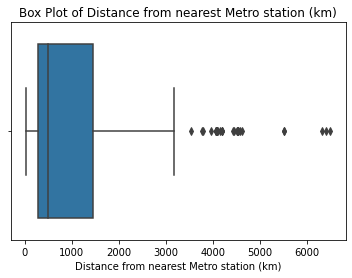

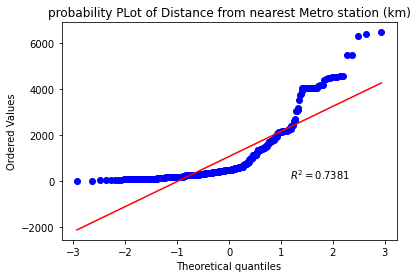

Skewness of Number of convenience stores: 0.15460656758377123
Kurtosis of Number of convenience stores: -1.0657514990134194


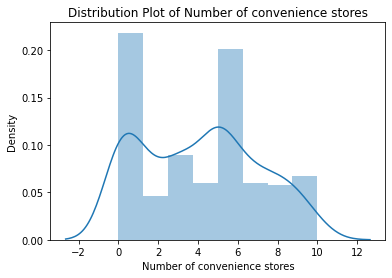

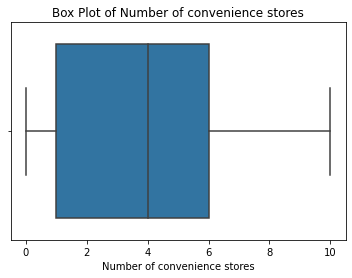

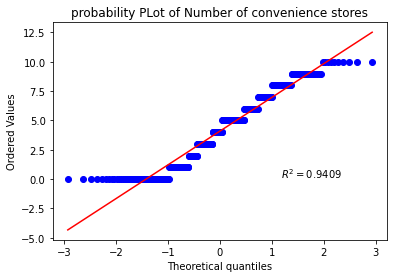

Skewness of latitude: -0.4385984450390504
Kurtosis of latitude: 0.26906977798608933


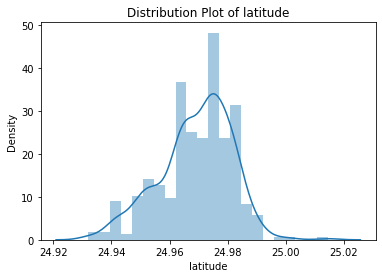

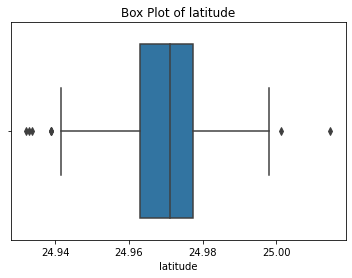

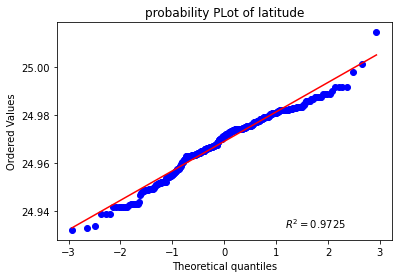

Skewness of longitude: -1.2195914979891498
Kurtosis of longitude: 1.2017924639738427


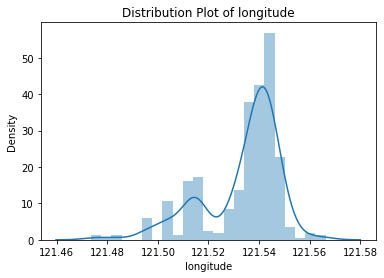

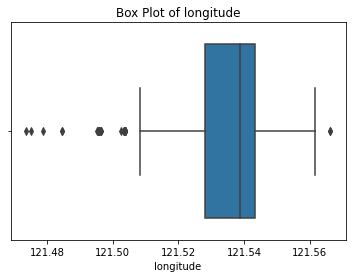

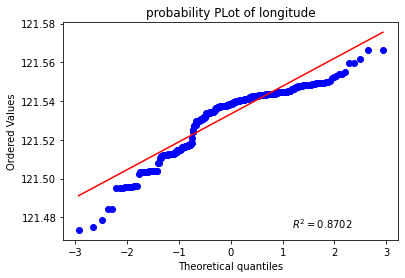

Skewness of Number of bedrooms: 0.022309017612164857
Kurtosis of Number of bedrooms: -1.5084574767476928


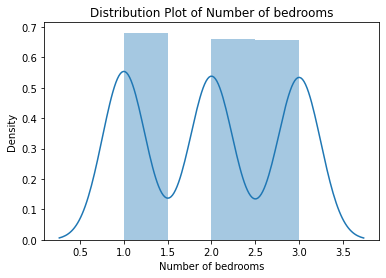

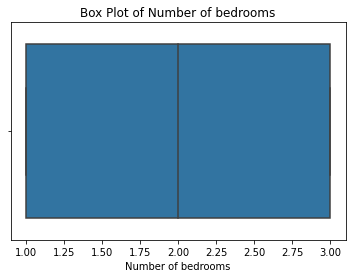

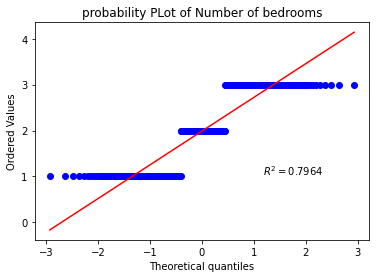

Skewness of House_Area (sqft): -0.11362728091036625
Kurtosis of House_Area (sqft): -1.4220194906438015


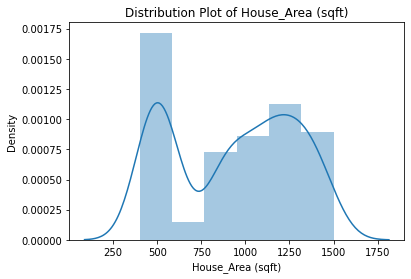

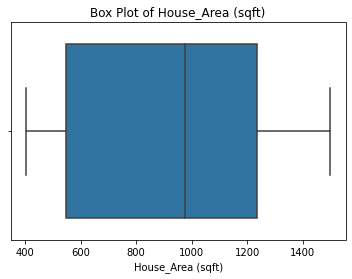

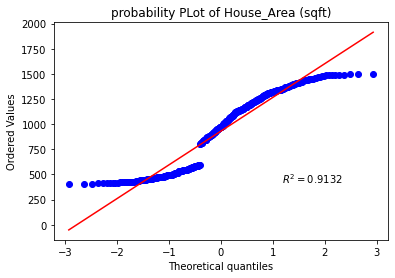

Skewness of House_Price: 0.5998525842660576
Kurtosis of House_Price: 2.1790970477396163


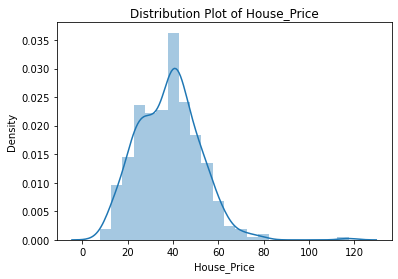

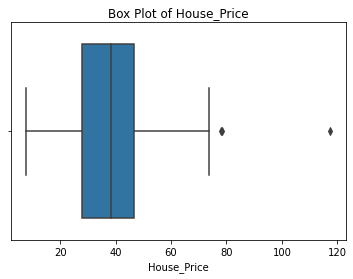

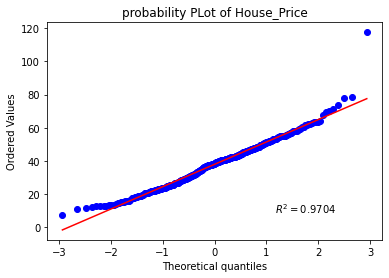

In [ ]:
for col in house_price_dataset.columns:
  if col != 'Transaction date':
    print(f"Skewness of {col}:", house_price_dataset[col].skew())
    print(f"Kurtosis of {col}:", house_price_dataset[col].kurtosis())
    
    sns.distplot(house_price_dataset[col])
    plt.title(f'Distribution Plot of {col}')
    plt.show()

    sns.boxplot(house_price_dataset[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

    probplot(house_price_dataset[col], plot = plt, rvalue = True)
    plt.title(f'probability PLot of {col}')
    plt.show();

The features **house age, distance** have a **right skewed distribution** from the nearest metro station and the target feature i.e, **house price** whereas those which have a **left-skewed distribution** are latitude and longitude.

In [ ]:
house_price_dataset.corr()['House_Price'].sort_values(ascending = False)[1:]

Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087529
Number of bedrooms                          0.050265
House_Area (sqft)                           0.046489
House_Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: House_Price, dtype: float64

The number of convenience stores, latitude and longitude are the features that have a significant positive correlation with the target house price feature. On the other hand, distance from the nearest metro station (in km) has a high negative correlation with house price.

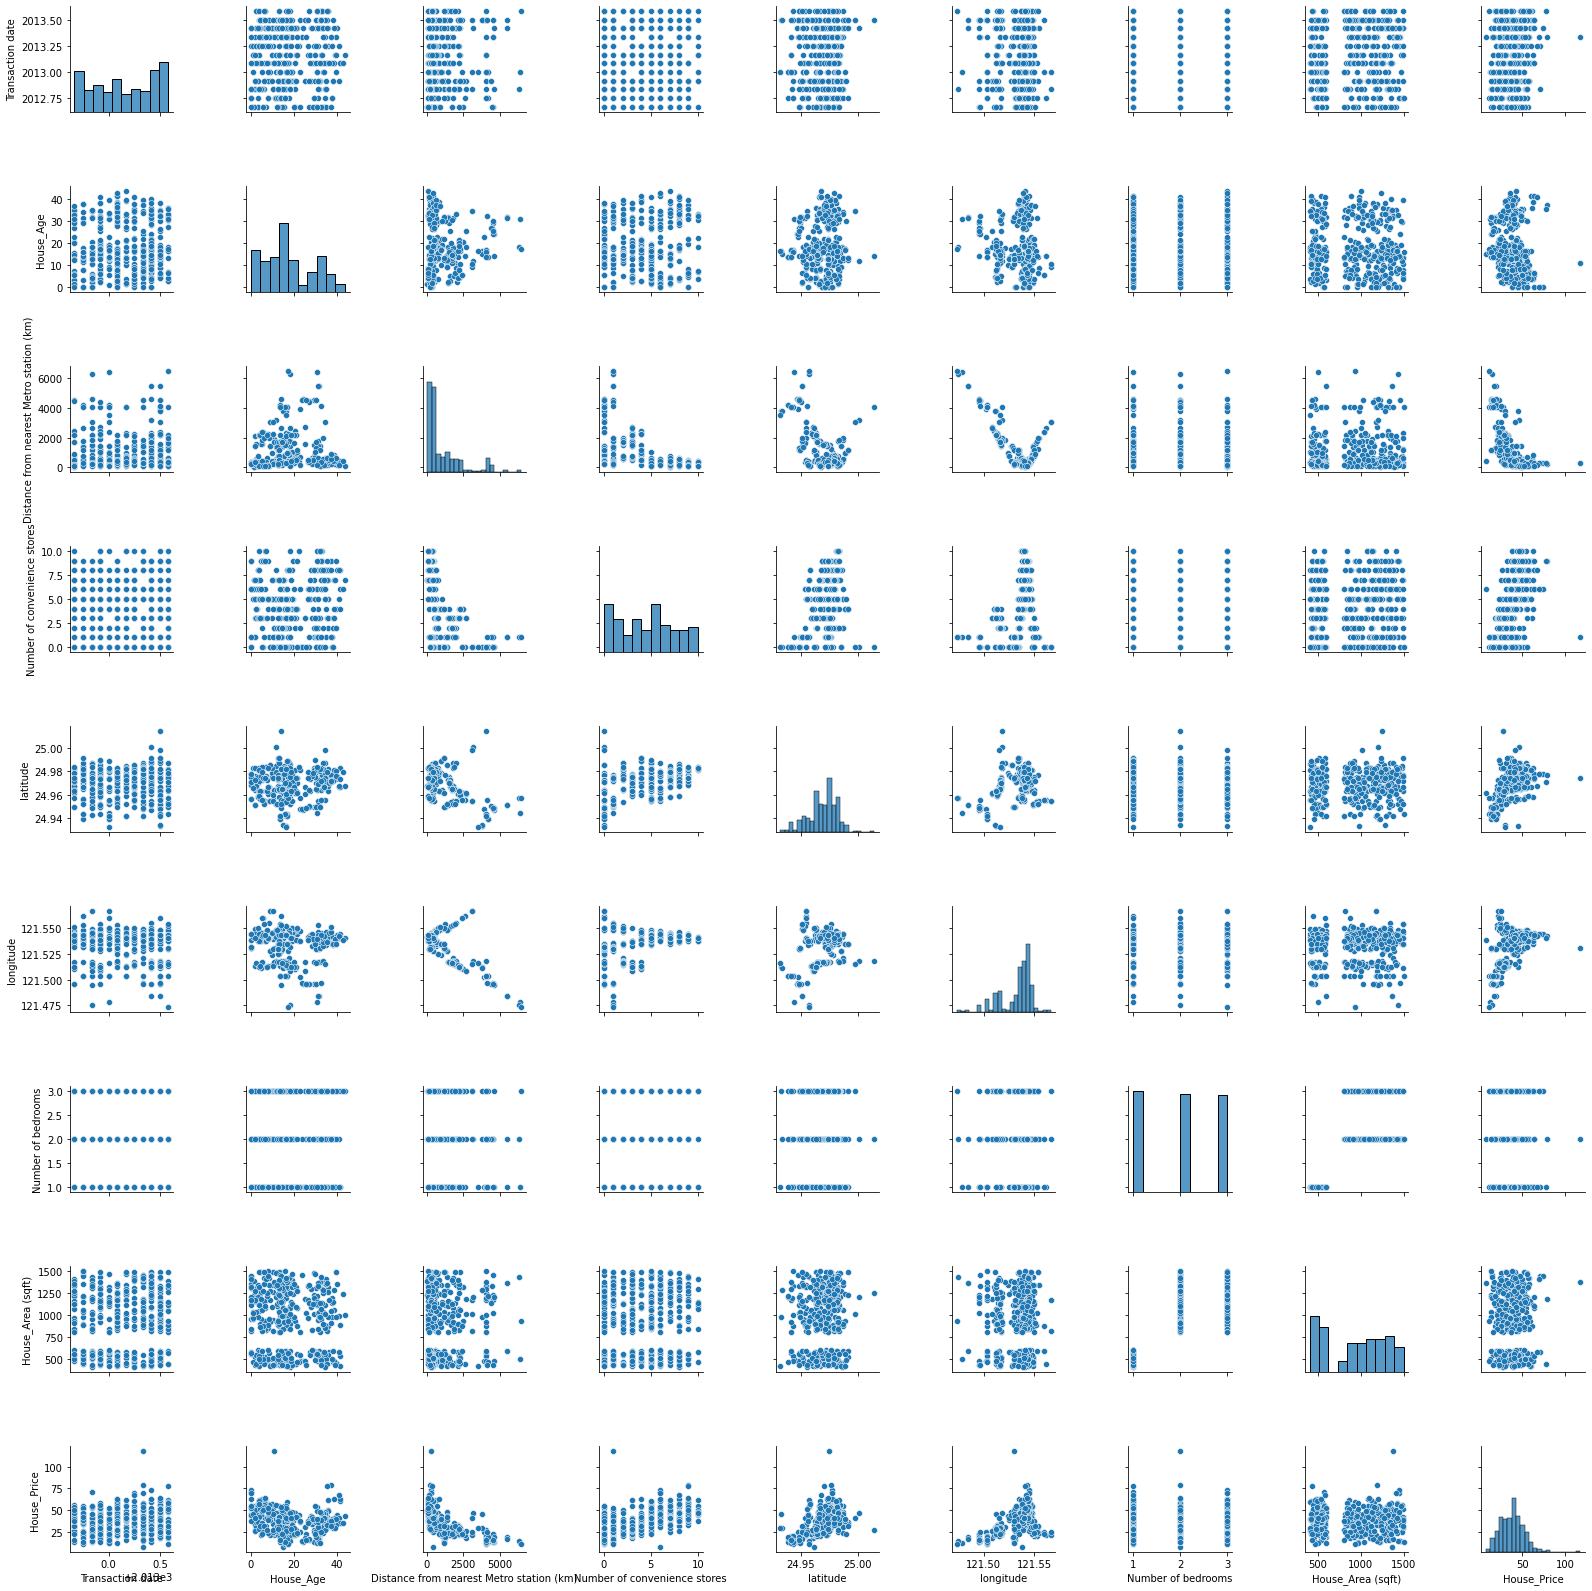

In [ ]:
sns.pairplot(house_price_dataset, palette = 'viridis')

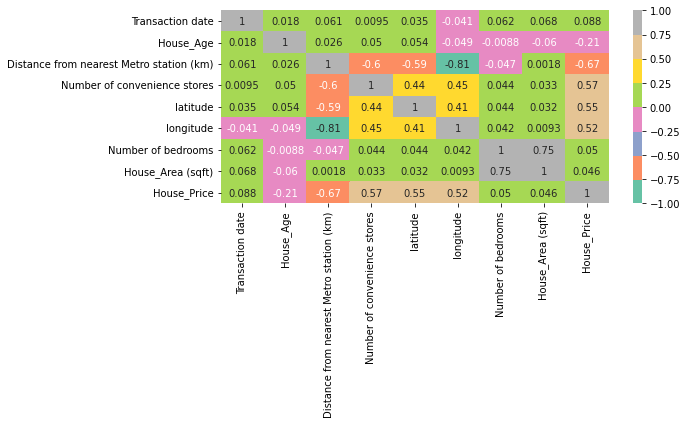

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(house_price_dataset.corr(), annot = True, cmap = 'Set2', vmin = -1, vmax = 1)
plt.tight_layout();

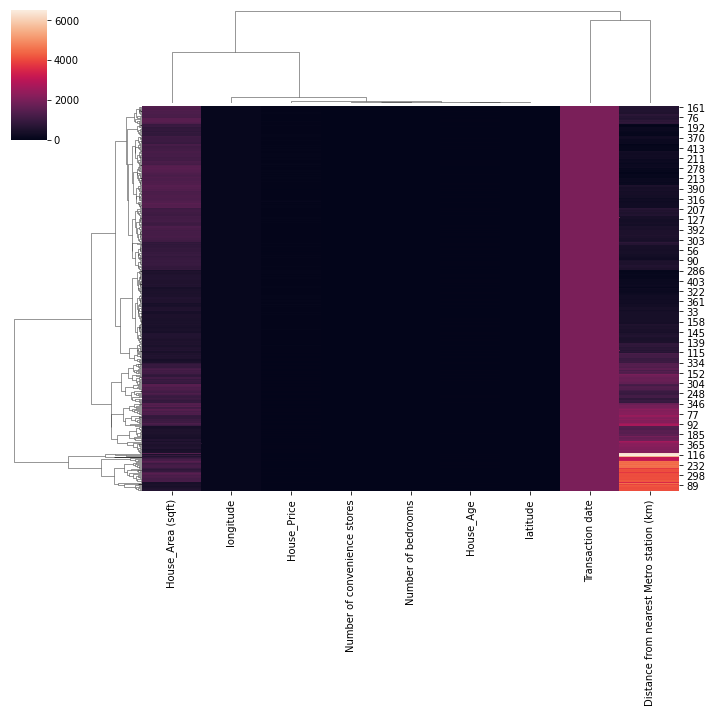

In [ ]:
sns.clustermap(house_price_dataset)

### Creating a copy of the original dataframe

In [ ]:
house_price_dataset_copy = house_price_dataset.copy()
house_price_dataset.head()

,Transaction date,House_Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House_Area (sqft),House_Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### Feature Scaling using Standard Scaler 

In [ ]:
scaler = StandardScaler()
features = house_price_dataset_copy.columns
house_price_dataset_copy = scaler.fit_transform(house_price_dataset_copy)
house_price_dataset_copy = pd.DataFrame(house_price_dataset_copy, columns = features)
house_price_dataset.head()

,Transaction date,House_Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House_Area (sqft),House_Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### Splitting the dataset into training and test sets

In [ ]:
X = house_price_dataset.drop('House_Price', axis = 1)
Y = house_price_dataset.House_Price

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101, shuffle=True)

### Model Training and Evaluation

In [ ]:
models = []
scores = []

In [ ]:
def fit_and_test_model(model):
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  print("RMSE:", np.sqrt(mean_squared_error(Y_test, pred)))
  print("R2 Score:", r2_score(Y_test, pred))
  models.append(str(model).split('(')[0])
  scores.append(r2_score(Y_test, pred))

In [ ]:
fit_and_test_model(LinearRegression())

RMSE: 6.866134533815743
R2 Score: 0.6438652713414719


In [ ]:
fit_and_test_model(KNeighborsRegressor())

RMSE: 7.784480149631059
R2 Score: 0.5422283006670428


In [ ]:
fit_and_test_model(SVR())

RMSE: 7.341659162224277
R2 Score: 0.5928277745006583


In [ ]:
fit_and_test_model(GradientBoostingRegressor())

RMSE: 5.374638875776146
R2 Score: 0.7817831475980221


In [ ]:
fit_and_test_model(BaggingRegressor())

RMSE: 6.144729774367624
R2 Score: 0.7147699445392997


In [ ]:
fit_and_test_model(HistGradientBoostingRegressor())

RMSE: 5.653976288623789
R2 Score: 0.7585108212734839


In [ ]:
fit_and_test_model(ExtraTreesRegressor())

RMSE: 5.180137923260342
R2 Score: 0.7972913155283262


In [ ]:
fit_and_test_model(DecisionTreeRegressor())

RMSE: 7.7138732164847
R2 Score: 0.5504948186646985


In [ ]:
fit_and_test_model(RandomForestRegressor())

RMSE: 5.8553844082177875
R2 Score: 0.7409995415905071


In [ ]:
fit_and_test_model(XGBRegressor())

[12:58:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 5.33271371428777
R2 Score: 0.7851742941374743


In [ ]:
fit_and_test_model(CatBoostRegressor())

Learning rate set to 0.033651
0:	learn: 14.1241495	total: 47.9ms	remaining: 47.9s
1:	learn: 13.8764684	total: 49.2ms	remaining: 24.6s
2:	learn: 13.6288218	total: 51ms	remaining: 16.9s
3:	learn: 13.4105086	total: 52.7ms	remaining: 13.1s
4:	learn: 13.1913690	total: 54.2ms	remaining: 10.8s
5:	learn: 12.9857671	total: 55.8ms	remaining: 9.24s
6:	learn: 12.7650770	total: 57.3ms	remaining: 8.13s
7:	learn: 12.5703653	total: 58.8ms	remaining: 7.3s
8:	learn: 12.3914403	total: 60.4ms	remaining: 6.64s
9:	learn: 12.2113399	total: 62.2ms	remaining: 6.16s
10:	learn: 12.0259559	total: 64ms	remaining: 5.76s
11:	learn: 11.8589065	total: 65.9ms	remaining: 5.42s
12:	learn: 11.6886072	total: 67.5ms	remaining: 5.12s
13:	learn: 11.5213490	total: 69ms	remaining: 4.86s
14:	learn: 11.3660748	total: 70.6ms	remaining: 4.63s
15:	learn: 11.2065066	total: 72.1ms	remaining: 4.43s
16:	learn: 11.0536121	total: 73.8ms	remaining: 4.27s
17:	learn: 10.8965437	total: 75.5ms	remaining: 4.12s
18:	learn: 10.7392175	total: 77.1

In [ ]:
fit_and_test_model(MLPRegressor())

RMSE: 6.712730161653157
R2 Score: 0.6596011467134029


In [ ]:
fit_and_test_model(LGBMRegressor())

RMSE: 5.784440062319054
R2 Score: 0.7472376645221062


### Performance Comparison of Baseline Models

In [ ]:
model_performances = pd.DataFrame([models, scores]).T
model_performances.columns = ['Model', 'R2 Score']
model_performances.set_index('Model', inplace = True)
model_performances = model_performances.sort_values('R2 Score', ascending = False)
model_performances

,R2 Score
Model,
<catboost.core.CatBoostRegressor object at 0x7f29c2dfdc70>,0.813914
ExtraTreesRegressor,0.797291
XGBRegressor,0.785174
GradientBoostingRegressor,0.781783
HistGradientBoostingRegressor,0.758511
LGBMRegressor,0.747238
RandomForestRegressor,0.741
BaggingRegressor,0.71477
MLPRegressor,0.659601


Among the baseline models, Cat Boost Regressor is the best performing model with an excellent accuracy score of about 81.3%.

### Model Optimization & Cross Validation using Hyperparameter Tuning

In [ ]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
cat = CatBoostRegressor(silent=True)
xgb = XGBRegressor(eval_metric = 'logloss', use_label_encoder=False)
bag = BaggingRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
hist = HistGradientBoostingRegressor()
lgbm = LGBMRegressor()

#KNN
para_knn = {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
grid_knn = GridSearchCV(knn, param_grid=para_knn) 

#Decision Tree
para_dt = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt)

#Random Forest
params_rf = {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False]}
grid_rf = GridSearchCV(rf, param_grid=params_rf)

#Histogram Gradient Boosting 
params_hist = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
grid_hist = GridSearchCV(hist, params_hist)

#Light GBM
params_lgbm = {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
grid_lgbm = GridSearchCV(lgbm, params_lgbm)

#CatBoost
params_cat = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_cat =  GridSearchCV(cat, params_cat)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  GridSearchCV(xgb, params_xgb)

#Bagging 
params_bag = {'n_estimators':[100,350,500,750]}
grid_bag = GridSearchCV(bag, params_bag)

#Extra Trees
params_et = {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
grid_et = GridSearchCV(et, params_et)

#Gradient Boosting
params_gb = {'n_estimators': np.arange(100,900,200), 'learning_rate': np.linspace(0,1,5), 'max_features': ['sqrt','log2'], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
grid_gb = GridSearchCV(gb, params_gb)

In [ ]:
grid_knn.fit(X_train,Y_train)
pred = grid_knn.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 7.491291685090836
R2 Score: 0.576061241625119


In [ ]:
grid_dt.fit(X_train,Y_train)
pred = grid_dt.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 6.922239137662739
R2 Score: 0.6380213918245525


In [ ]:
grid_rf.fit(X_train,Y_train)
pred = grid_rf.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 5.747798883132914
R2 Score: 0.7504297372876524


In [ ]:
grid_xgb.fit(X_train,Y_train)
pred = grid_xgb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
grid_et.fit(X_train,Y_train)
pred = grid_et.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 4.886840224933248
R2 Score: 0.8195960721919394


In [ ]:
grid_cat.fit(X_train,Y_train)
pred = grid_cat.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 5.2850056659347935
R2 Score: 0.7890008900443867


In [ ]:
grid_bag.fit(X_train,Y_train)
pred = grid_bag.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 5.65238690415702
R2 Score: 0.7586465718258149


In [ ]:
grid_gb.fit(X_train,Y_train)
pred = grid_gb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 5.337889852201975
R2 Score: 0.7847570554856508


In [ ]:
grid_hist.fit(X_train,Y_train)
pred = grid_hist.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 5.344353985027714
R2 Score: 0.7842354255971342


In [ ]:
grid_lgbm.fit(X_train,Y_train)
pred = grid_lgbm.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(Y_test,pred)))
print("R2 Score:",r2_score(Y_test,pred))

RMSE: 6.055001192780785
R2 Score: 0.7230392829464825


Upon completion of hyperparameter tuning of baseline models, the model which exhibits the best performance is Extra Trees Regressor as its accuracy score increased significantly from just over 79.5% to nearly 81.4%.